In [1]:
import numpy as np
import cv2
import AAM
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

from tqdm import *

In [2]:
#AAM.display_face(AAM.REF_FACE_IMG)

In [3]:
woman = AAM.AAM('data/sa1', 27, 119)

In [4]:
woman.fit()

100%|██████████| 119/119 [00:58<00:00,  2.02it/s]


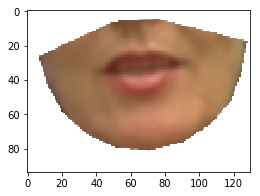

In [5]:
test = woman.reconstruct_face(np.zeros(16))
AAM.display_face(test, figsize=(4, 3))

In [6]:
pred_imgs = []
for b in tqdm(woman.lowdim_b):
    pred_imgs.append(woman.reconstruct_face(b))

100%|██████████| 119/119 [01:05<00:00,  1.81it/s]


In [25]:
FRAME_LEN = woman.NUM_FRAMES
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
pic = ax1.imshow(cv2.cvtColor(pred_imgs[0], cv2.COLOR_BGR2RGB))

for idx, b in enumerate(woman.lowdim_b):
    ax2.annotate(str(idx), (idx, b[0]))
    ax3.annotate(str(idx), (idx, b[1]))
    ax4.annotate(str(idx), (idx, b[2]))

ax2.plot(np.arange(len(woman.lowdim_b)), woman.lowdim_b[:, 0])
indicator1 = ax2.scatter([], [], s=150)
ax3.plot(np.arange(len(woman.lowdim_b)), woman.lowdim_b[:, 1])
indicator2 = ax3.scatter([], [], s=150)
ax4.plot(np.arange(len(woman.lowdim_b)), woman.lowdim_b[:, 2])
indicator3 = ax4.scatter([], [], s=150)

plt.close() # don't show initial face

def init():

    return []

# animation function. This is called sequentially
def animate(i):
    pic.set_data(cv2.cvtColor(pred_imgs[i], cv2.COLOR_BGR2RGB))
    indicator1.set_offsets(np.c_[[i], [woman.lowdim_b[i, 0]]])
    indicator2.set_offsets(np.c_[[i], [woman.lowdim_b[i, 1]]])
    indicator3.set_offsets(np.c_[[i], [woman.lowdim_b[i, 2]]])
    return []

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=FRAME_LEN, interval=120, blit=True)
HTML(anim.to_html5_video())